In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def json2dataframes(file_path: str):
    """
    This function takes in the path to metrics.json from Detectron2 training
    and returns 2 Pandas dataframes of validation AP and loss data respectively

    Parameters:
        file_path: string containing path to metrics.json file of interest

    Returns:
        average_precision: Pandas dataframe containing validation AP data
        losses: Pandas dataframe containing validation loss data

    """
    with open(file_path) as read_file:
        lines = read_file.readlines()

    AP, L = [], []
    for line in lines:
        json_dict = json.loads(line)
        if 'bbox/AP' in json_dict:
            AP.append(json_dict)
        else:
            L.append(json_dict)

    average_precision = pd.DataFrame(AP)
    losses = pd.DataFrame(L)

    return average_precision, losses

In [ ]:
def plot_kp_bbox_AP_loss(ap_loss_labels):
    """
    This function takes a list of tuples:
      (DataFrame average_precision, DataFrame loss, label string)
    and generates Matplotlib plots of keypoints/AP and bbox/AP

    Parameters:
        data_labels: List of tuples (DataFrame average_precision, DataFrame loss, label string)
        for generating Matplotlib plots

    Returns:
        N/A
    """

    # Plot keypoints/AP
    for AP, loss, label in ap_loss_labels:
        plt.plot(AP['iteration'], AP['keypoints/AP'], label=f"{label}")
    plt.title("Validation Keypoints/Average Precision")
    plt.xlabel("Iterations")
    plt.ylabel("AP")
    plt.legend()
    plt.show()
    plt.savefig('kp_AP.png', bbox_inches='tight')

    # Plot bbox/AP
    for AP, loss, label in ap_loss_labels:
        plt.plot(AP['iteration'], AP['bbox/AP'], label=f"{label}")
    plt.title("Validation Bbox/Average Precision")
    plt.xlabel("Iterations")
    plt.ylabel("AP")
    plt.legend()
    plt.show()
    plt.savefig('bbox_AP.png', bbox_inches='tight')

    # Plot total loss
    for AP, loss, label in ap_loss_labels:
        plt.plot(loss['iteration'], loss['total_loss'], label=f"{label}")
    plt.title("Total Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    plt.savefig('loss.png', bbox_inches='tight')

In [ ]:
# Load metrics.jsons for R50, R101, X101 with and without data augmentation

# R50
R50_dataset1000 = 'R50_dataset1000_no_augment_iter5000_metrics.json'
R50_dataset1000_AP, R50_dataset1000_loss = json2dataframes(R50_dataset1000

R50_dataset1000_augment = 'R50_dataset1000_augment_iter5000_metrics.json'
R50_dataset1000_augment_AP, R50_dataset1000_augment_loss = json2dataframes(R50_dataset1000_augment)

# R101
R101_dataset1000 = 'R101_dataset1000_no_augment_iter5000_metrics.json'
R101_dataset1000_AP, R101_dataset1000_loss = json2dataframes(R101_dataset1000)

R101_dataset1000_augment = 'R101_dataset1000_augment_iter5000_metrics.json'
R101_dataset1000_augment_AP, R101_dataset1000_augment_loss = json2dataframes(R101_dataset1000_augment)

# X101
X101_dataset1000 = 'X101_dataset1000_no_augment_iter5000_metrics.json'
X101_dataset1000_AP, X101_dataset1000_loss = json2dataframes(X101_dataset1000)

X101_dataset1000_augment = 'X101_dataset1000_augment_iter5000_metrics.json'
X101_dataset1000_augment_AP, X101_dataset1000_augment_loss = json2dataframes(X101_dataset1000_augment)

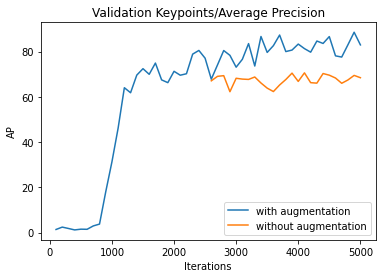

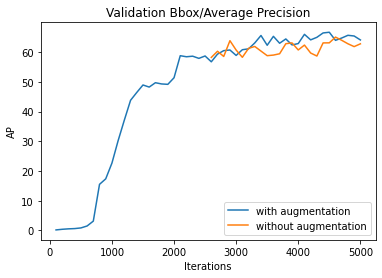

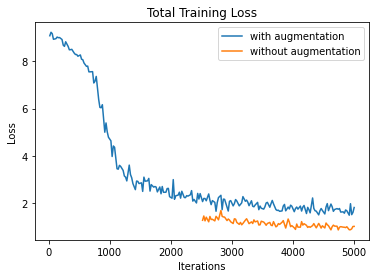

In [ ]:
all_data = [(R50_dataset1000_AP, R50_dataset1000_loss, 'R50 without augmentation'), 
            (R50_dataset1000_augment_AP, R50_dataset1000_augment_loss, 'R50 with augmentation'),
            (R101_dataset1000_AP, R101_dataset1000_loss, 'R101 without augmentation'),
            (R101_dataset1000_augment_AP, R101_dataset1000_augment_loss, 'R101 with augmentation'),
            (X101_dataset1000_AP, X101_dataset1000_loss, 'X101 without augmentation'),
            (X101_dataset1000_augment_AP, X101_dataset1000_augment_loss, 'X101 with augmentation')]

plot_kp_bbox_AP_loss(all_data)